In [1]:
%matplotlib inline
import os
import sys
import copy
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import adjusted_mutual_info_score as ami

In [18]:
from sklearn.metrics import adjusted_mutual_info_score as ami

In [2]:
sys.path.insert(1, os.path.join(sys.path[0],"/home/tkurihana/scratch-midway2/data/MOD06/" ) )
from analysis_lib import _get_swath, _load_tif_data
from analysis_lib import _get_colors, _gen_patches, _anl_agl
from analysis_lib import cluster_plotting2, cluster_plotting

In [3]:
gee_datadir = '/home/tkurihana/scratch-midway2/data/GEE'
swath_filename = '2017-01-01_MOD09GA_mixed-cell.tif'
swath1 = _get_swath(gee_datadir, swath_filename)

 Shape  (2219, 4991, 7)


#### Function

In [4]:
def _get_swath_patches(swath1, iteration=0, model_dir='./', ):
    # encoder part
    ENCODER_DEF=model_dir+'encoder.json'
    ENCODER_WEIGHTS=model_dir+'encoder-'+str(iteration)+'.h5'
    with open(ENCODER_DEF,"r") as f:
        encoder = tf.keras.models.model_from_json(f.read())
    encoder.load_weights(ENCODER_WEIGHTS)
    
    # patches part
    SHAPE = 128, 128, 7
    patches = _gen_patches(swath1, normalization=True)
    for icluster in [10]:
        _patches_labels = _anl_agl(encoder, patches, clusters=icluster)
    return _patches_labels

Compare clustering perfomance at 60,000 iteration

m22 is the most similar / the highest AMI scire against Ricardo's model

### m22_JJA

In [12]:
m22_dir='/project/foster/clouds/output//m9_22_Global_JJA_2015_2016/'
iteration=60000
m9_22_labels = _get_swath_patches(swath1,
                                   iteration=iteration, 
                                   model_dir=m22_dir) 

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/tensorflow/python/keras/layers/core.py:791: UserWarning: models is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


### m26_June

In [13]:
m26_dir='/project/foster/clouds/output/m9_26_Global_June_2015_2016/'
iteration=60000
m9_26_labels =_get_swath_patches(swath1,
                                   iteration=iteration, 
                                   model_dir=m26_dir) 

### AMI at 60000 steps

In [15]:
_ami = ami(m9_22_labels.flatten(), m9_26_labels.flatten())

In [16]:
_ami

0.3630361613012691

### AMI from 10,000 to 160,000

In [19]:
amis = []
for i in range(10000, 165000, 5000):
    _m9_22_labels = _get_swath_patches(swath1,
                                   iteration=i, 
                                   model_dir=m22_dir) 
    amis += [ami(_m9_22_labels.flatten(), m9_26_labels.flatten())]

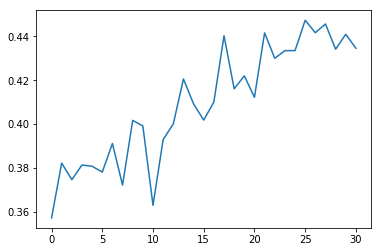

In [20]:
plt.plot(np.arange(len(amis)) , amis)

In [27]:
x = [ i for i in range(10000, 165000, 5000)]

In [46]:
[ str(x[i]*0.001) for i in range(0,10)]

['10.0',
 '15.0',
 '20.0',
 '25.0',
 '30.0',
 '35.0',
 '40.0',
 '45.0',
 '50.0',
 '55.0']

Text(0, 0.5, 'AMI Score')

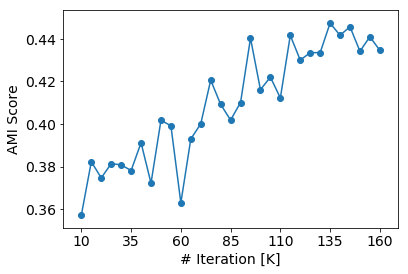

In [60]:
plt.plot(np.arange(len(amis)) , amis)
plt.scatter(np.arange(len(amis)) , amis)
x = [ i for i in range(10000, 165000, 5000)]
plt.xticks([j for j in range(0,31,5)] , 
           [ str(int(x[i]*0.001) ) for i in range(0,31,5)], fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("# Iteration [K]", fontsize=14)
plt.ylabel("AMI Score", fontsize=14)

### Plotting

#### m26 model

In [51]:
model_dir = m26_dir
iteration = 60000

In [52]:
# encoder part
ENCODER_DEF=model_dir+'encoder.json'
ENCODER_WEIGHTS=model_dir+'encoder-'+str(iteration)+'.h5'
with open(ENCODER_DEF,"r") as f:
    encoder_m26 = tf.keras.models.model_from_json(f.read())
encoder_m26.load_weights(ENCODER_WEIGHTS)

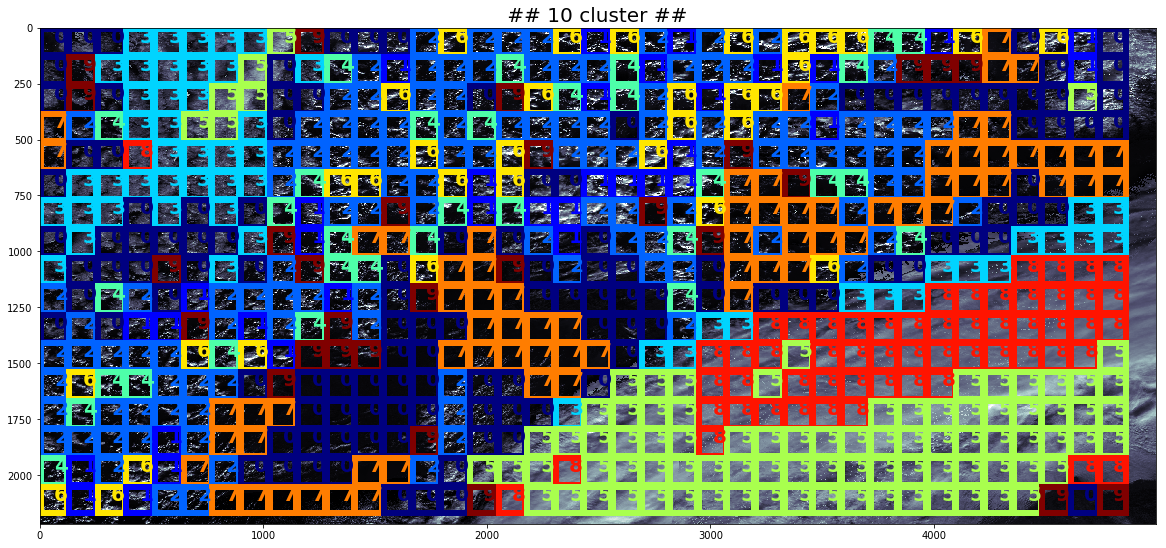

In [53]:
SHAPE = 128, 128, 7
patches = _gen_patches(swath1, normalization=True)
for icluster in [10]:
    _patches_labels = _anl_agl(encoder_m26, patches, clusters=icluster)
    colors = _get_colors(n=icluster)
    cluster_plotting(swath1, patches,_patches_labels, SHAPE, colors, ncluster=icluster)

In [54]:
model_dir = m22_dir
iteration = 135000

In [55]:
# encoder part
ENCODER_DEF=model_dir+'encoder.json'
ENCODER_WEIGHTS=model_dir+'encoder-'+str(iteration)+'.h5'
with open(ENCODER_DEF,"r") as f:
    encoder_m22 = tf.keras.models.model_from_json(f.read())
encoder_m22.load_weights(ENCODER_WEIGHTS)

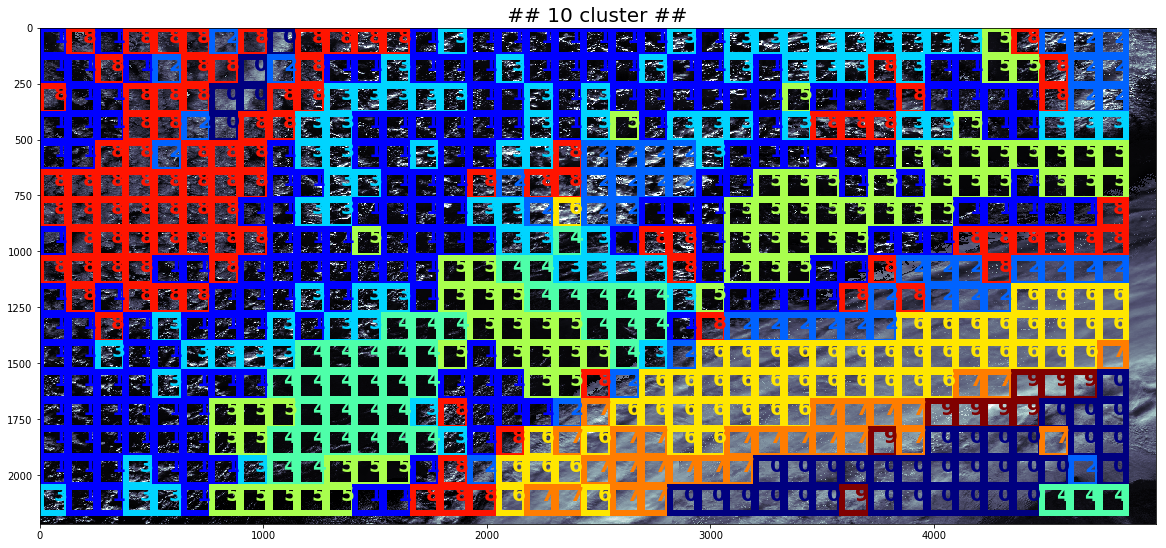

In [56]:
SHAPE = 128, 128, 7
patches = _gen_patches(swath1, normalization=True)
for icluster in [10]:
    _patches_labels = _anl_agl(encoder_m22, patches, clusters=icluster)
    colors = _get_colors(n=icluster)
    cluster_plotting(swath1, patches,_patches_labels, SHAPE, colors, ncluster=icluster)